In [1]:
# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from numpy import arange

from src.diamonFun import pipeline, clean_columns

In [59]:
df_original= pd.read_csv("diamonds-datamad0620/train.csv")

In [60]:
df_original.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381


## Clean the data. Switch columns to numeric

In [61]:
df_original=clean_columns(df_original)

In [62]:
y=df_original["price"]

In [63]:
df_original.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut_numeric,color_numeric,clarity_numeric
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605,3,5,4
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565,5,6,3
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720,3,7,3
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793,4,3,5
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381,3,7,3


## Drop string columns

In [64]:
df= df_original[["carat","cut_numeric","color_numeric","clarity_numeric", "x","y","z", "depth", "table"]]

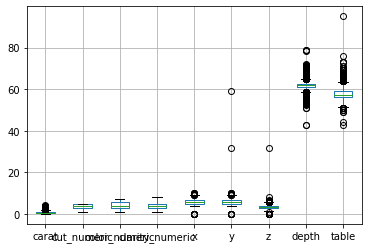

In [65]:
df.boxplot()

## Standarize the data

In [66]:
X= pipeline(df)

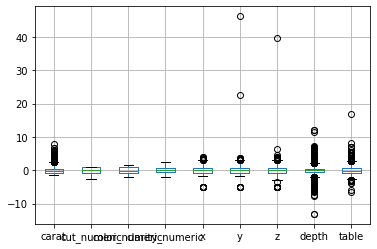

In [67]:
X.boxplot()

## Train models with all columns

In [68]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.2)

In [69]:
estimators = [('lr', RidgeCV()),('svr', LinearSVR(random_state=42))]
extra_tree = ExtraTreeRegressor(random_state=0)

In [94]:
models = {
    "MLPC" : MLPRegressor(),
    "RandomForest" : RandomForestRegressor(),
    "KNeighors": KNeighborsRegressor(),
    "SVR": SVR(),
    "Tree" : DecisionTreeRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Stacking": StackingRegressor(estimators=estimators,
final_estimator=RandomForestRegressor(n_estimators=10,random_state=42)),
    "Bagging": BaggingRegressor(extra_tree, random_state=0),
}

In [190]:
for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train,y_train)
print("Done")

Training MLPC


/home/jorge/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training RandomForest
Training KNeighors
Training SVR
Training Tree
Training AdaBoost
Training Stacking
Training extra
Done


In [191]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("r2 score",round(r2_score(y_test, y_pred),3))

-------MLPC-------
r2 score 0.942
-------RandomForest-------
r2 score 0.98
-------KNeighors-------
r2 score 0.964
-------SVR-------
r2 score 0.461
-------Tree-------
r2 score 0.965
-------AdaBoost-------
r2 score 0.913
-------Stacking-------
r2 score 0.922
-------extra-------
r2 score 0.98


### RandomForest and Bagging have a good performance

## Drop depth and table columns and make the same process

In [165]:
df= df[["carat","cut_numeric","color_numeric","clarity_numeric", "x","y","z"]]

In [166]:
X= pipeline(df)

In [167]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.2)

In [168]:
for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train,y_train)
print("done ")

Training MLPC


/home/jorge/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training RandomForest
Training KNeighors
Training SVR
Training Tree
Training AdaBoost
Training Stacking
Training extra
done 


In [169]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("r2 score",round(r2_score(y_test, y_pred),3))
    print("MSE",round(mean_squared_error(y_test, y_pred)))

-------MLPC-------
r2 score 0.955
MSE 707138
-------RandomForest-------
r2 score 0.98
MSE 322081
-------KNeighors-------
r2 score 0.972
MSE 432914
-------SVR-------
r2 score 0.527
MSE 7441231
-------Tree-------
r2 score 0.962
MSE 597741
-------AdaBoost-------
r2 score 0.915
MSE 1342210
-------Stacking-------
r2 score 0.928
MSE 1125829
-------extra-------
r2 score 0.979
MSE 333161


# As before, RandomForest and Bagging have a high performance

# Drop x, y , z columns

In [170]:
df= df[["carat","cut_numeric","color_numeric","clarity_numeric"]]

In [171]:
X= pipeline(df)

In [172]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.25)

In [173]:
for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train,y_train)
print("He acabado :) ")

Training MLPC


/home/jorge/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training RandomForest
Training KNeighors
Training SVR
Training Tree
Training AdaBoost
Training Stacking
Training extra
He acabado :) 


In [174]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("r2 score",round(r2_score(y_test, y_pred),3))

-------MLPC-------
r2 score 0.959
-------RandomForest-------
r2 score 0.977
-------KNeighors-------
r2 score 0.974
-------SVR-------
r2 score 0.413
-------Tree-------
r2 score 0.97
-------AdaBoost-------
r2 score 0.917
-------Stacking-------
r2 score 0.937
-------extra-------
r2 score 0.977


## After all tests, RandomForest and Bagging had always high performace, so we will keep both. Also, we will keep all columns

In [70]:
models = {
    "RandomForest" : RandomForestRegressor(),
    "extra": BaggingRegressor(extra_tree, random_state=0),
}

In [71]:
df= df_original[["carat","cut_numeric","color_numeric","clarity_numeric", "x","y","z", "depth", "table"]]

In [72]:
X= pipeline(df)

In [74]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.2)

In [93]:
model = BaggingRegressor(extra_tree, random_state=0, n_estimators=2400)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("r2 score",round(r2_score(y_test, y_pred),3))
print("MSE",round(mean_squared_error(y_test, y_pred),3))

r2 score 0.982
MSE 267966.37


In [17]:
model = BaggingRegressor(extra_tree, random_state=42, n_estimators=2000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("r2 score",round(r2_score(y_test, y_pred),3))

r2 score 0.983


## Try to find the best parameters with GridSearch and Cross Validation

In [16]:
parameters= {'max_depth':[20,30]}

In [60]:
rfr = RandomForestRegressor(n_estimators=1200)
grid = GridSearchCV(rfr,parameters,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 18.3min finished


GridSearchCV(estimator=RandomForestRegressor(n_estimators=1200),
             param_grid={'max_depth': [20, 30]}, verbose=1)

In [61]:
print(grid.best_params_)

{'max_depth': 30}


In [111]:
model = RandomForestRegressor(n_estimators=1200, max_depth=30)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("r2 score",round(r2_score(y_test, y_pred),3))
print("MSE",round(mean_squared_error(y_test, y_pred),3))

r2 score 0.982
MSE 273285.753


## Divide df in expensive and cheap diamonds

In [177]:
df= df_original[["carat","cut_numeric","color_numeric","clarity_numeric", "x","y","z", "depth", "table", "price"]]

In [179]:
df.sort_values(by="price", ascending=False, inplace=True )

/home/jorge/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [180]:
df.shape

(40455, 10)

In [181]:
df_expensive=df[:20227]
df_cheap=df[20227:]

In [182]:
y_expensive=df_expensive["price"]
y_cheap=df_cheap["price"]

In [183]:
df_expensive.drop(columns="price", inplace=True)
df_cheap.drop(columns="price", inplace=True)

/home/jorge/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [184]:
X_expensive= pipeline(df_expensive)

In [185]:
X_train, X_test, y_train, y_test  = train_test_split(X_expensive,y_expensive,test_size = 0.2)

In [186]:
model = RandomForestRegressor(n_estimators=1200)
model.fit(X_train,y_train)
y_pred_expensive = model.predict(X_test)
print("r2 score",round(r2_score(y_test, y_pred_expensive),3))

r2 score 0.962


In [187]:
X_cheap= pipeline(df_cheap)

In [188]:
X_train, X_test, y_train, y_test  = train_test_split(X_cheap,y_cheap,test_size = 0.2)

In [189]:
model = RandomForestRegressor(n_estimators=1200)
model.fit(X_train,y_train)
y_pred_cheap = model.predict(X_test)
print("r2 score",round(r2_score(y_test, y_pred_cheap),3))

r2 score 0.966


## The results are even worst. Check with other models

In [95]:
for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train,y_train)
print("Done")

Training MLPC


/home/jorge/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training RandomForest
Training KNeighors
Training SVR
Training Tree
Training AdaBoost
Training Stacking
Training Bagging
Done


In [96]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("r2 score",round(r2_score(y_test, y_pred),3))
    print("MSE",round(mean_squared_error(y_test, y_pred)))

-------MLPC-------
r2 score 0.896
MSE 1576586
-------RandomForest-------
r2 score 0.96
MSE 600461
-------KNeighors-------
r2 score 0.934
MSE 1007328
-------SVR-------
r2 score 0.27
MSE 11090762
-------Tree-------
r2 score 0.93
MSE 1061200
-------AdaBoost-------
r2 score 0.859
MSE 2146627
-------Stacking-------
r2 score 0.851
MSE 2264914
-------Bagging-------
r2 score 0.959
MSE 621620


# Still not working. We keep our 2 models

In [15]:
predict= pd.read_csv("diamonds-datamad0620/predict.csv")

In [16]:
predict.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,2.36,Ideal,I,SI2,60.8,54.0,8.68,8.57,5.24
1,1,2.04,Ideal,H,SI2,62.0,56.0,8.18,8.23,5.09
2,2,0.51,Ideal,I,SI1,61.7,54.0,5.18,5.19,3.20
3,3,0.30,Ideal,I,SI1,61.3,56.0,4.32,4.33,2.65
4,4,0.96,Fair,H,VS2,68.8,56.0,6.11,5.98,4.16


In [17]:
predict=clean_columns(predict)

In [18]:
predict= predict[["carat","cut_numeric","color_numeric","clarity_numeric", "x","y","z", "depth", "table"]]

In [19]:
X= pipeline(df)

In [28]:
model = BaggingRegressor(extra_tree, random_state=0, n_estimators=2000)
model.fit(X_train,y_train)

BaggingRegressor(base_estimator=ExtraTreeRegressor(random_state=0),
                 n_estimators=2000, random_state=0)

In [ ]:
y=model.predict(X_test)

In [87]:
submission= pd.read_csv("diamonds-datamad0620/sample_submission.csv", index_col=0)

In [88]:
submission.drop(columns="price", inplace=True)

In [89]:
submission.shape

(13485,)

In [90]:
submission["price"]= y

In [91]:
submission.to_csv('extra2000.csv')

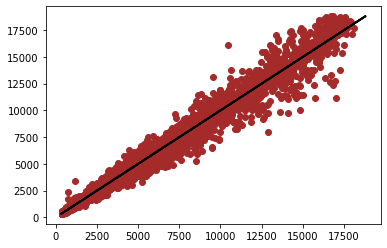

In [110]:
plt.scatter(y_pred, y_test,  color='brown')
plt.plot(y_test, y_test, color='black', linewidth=2)
plt.show()